In [8]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [9]:
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)

/opt/homebrew/anaconda3/envs/mlintro/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [10]:
data

(       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
        pixel1

In [11]:
pixel_values, targets = data

In [12]:
pixel_values.shape

(70000, 784)

In [15]:
targets

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [16]:
targets = targets.astype(int)

In [26]:
single_image = pixel_values.iloc[1, :].values.reshape(28, 28)

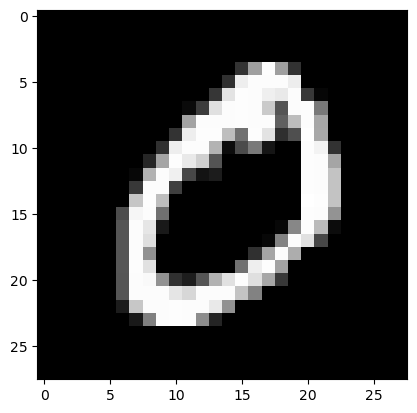

In [27]:
plt.imshow(single_image, cmap='gray')

In [28]:
tsne = manifold.TSNE(n_components=2, random_state=42)

In [29]:
data_transformed = tsne.fit_transform(pixel_values.iloc[:3000, :])

In [31]:
data_transformed.shape

(3000, 2)

In [33]:
import numpy as np

In [34]:
tsne_df = pd.DataFrame(
    np.column_stack((data_transformed, targets.iloc[:3000])),
    columns=['x', 'y', 'targets']
)

In [35]:
tsne_df.loc[:, 'targets'] = tsne_df['targets'].astype(int)

In [36]:
tsne_df

,x,y,targets
0,19.590929,-8.575294,5.0
1,56.732582,-2.505789,0.0
2,1.107401,-54.267242,4.0
3,-42.779736,10.238948,1.0
4,-9.180800,-32.872486,9.0
...,...,...,...
2995,-35.381805,-25.800554,7.0
2996,51.262691,-5.006744,0.0
2997,-30.667128,-13.721054,9.0
2998,-27.238247,43.726170,1.0


/opt/homebrew/anaconda3/envs/mlintro/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


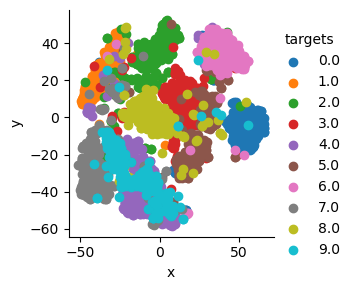

In [38]:
grid = sns.FacetGrid(tsne_df, hue='targets')
grid.map(plt.scatter, 'x', 'y').add_legend()

In [39]:
import pandas as pd
df = pd.read_csv('./data/aaamlp/winequality-red.csv')

In [40]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [42]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [43]:
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

In [44]:
df.loc[:, 'quality'] = df['quality'].map(quality_mapping)

In [45]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [48]:
df = df.sample(frac=1).reset_index(drop=True)

In [49]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.7,0.690,0.49,1.8,0.115,20.0,112.0,0.99680,3.21,0.71,9.3,2
1,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,2
2,7.1,0.560,0.14,1.6,0.078,7.0,18.0,0.99592,3.27,0.62,9.3,2
3,6.6,0.580,0.02,2.4,0.069,19.0,40.0,0.99387,3.38,0.66,12.6,3
4,9.8,0.500,0.49,2.6,0.250,5.0,20.0,0.99900,3.31,0.79,10.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.4,2
1595,6.1,0.320,0.25,1.8,0.086,5.0,32.0,0.99464,3.36,0.44,10.1,2
1596,6.4,0.570,0.02,1.8,0.067,4.0,11.0,0.99700,3.46,0.68,9.5,2
1597,7.9,0.350,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,5


In [50]:
df_train = df.head(1000)

df_test = df.tail(599)

In [51]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth=3)

In [52]:
cols = [
    'fixed acidity',
    'volatile acidity',
    'residual sugar', 'chlorides',
'free sulfur dioxide', 'total sulfur dioxide', 'density',
'pH', 'sulphates', 'alcohol'
]

In [53]:
clf.fit(df_train[cols], df_train['quality'])

DecisionTreeClassifier(max_depth=3)

In [54]:
train_predictions = clf.predict(df_train[cols])

In [55]:
test_predictions = clf.predict(df_test[cols])

In [56]:
train_accuracy = metrics.accuracy_score(
    df_train['quality'], train_predictions
)

In [57]:
test_accuracy = metrics.accuracy_score(
    df_test['quality'], test_predictions
)

In [58]:
train_accuracy

0.596

In [59]:
test_accuracy

0.5358931552587646

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
train_accuracies = [0.5]
test_accuracies = [0.5]

for depth in range(1, 25):
    clf = DecisionTreeClassifier(max_depth=depth)
    
    cols = [
        'fixed acidity',
        'volatile acidity',
        'residual sugar', 'chlorides',
        'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol'
    ]
    
    # fit the model on given features
    clf.fit(df_train[cols], df_train['quality'])

    # create training & testing predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(
        df_train['quality'], train_predictions
    )
    test_accuracy = metrics.accuracy_score(
        df_test['quality'], test_predictions
    )
    
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

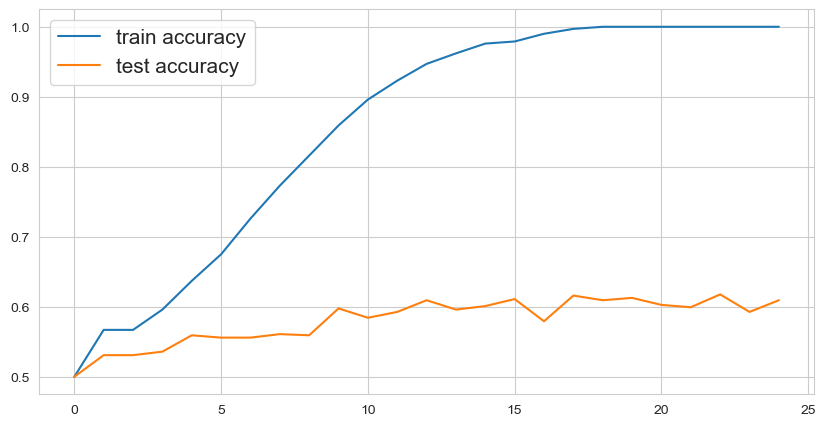

In [63]:
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
plt.plot(train_accuracies, label='train accuracy')
plt.plot(test_accuracies, label='test accuracy')
plt.legend(loc='upper left', prop={'size': 15})

## Cross Validation

In [64]:
import pandas as pd

In [65]:
df = pd.read_csv('./data/aaamlp/winequality-red.csv')

In [66]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [67]:
df.shape

(1599, 12)

In [70]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [71]:
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

df.loc[:, 'quality'] = df['quality'].map(quality_mapping)

In [73]:
df['quality'].unique()

array([2, 3, 4, 1, 5, 0])

In [76]:
# use sample with frac = 1 to shuffle the dataframe
# we reset the indices since they change after shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [77]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,9.0,0.48,0.32,2.80,0.084,21.0,122.0,0.99840,3.32,0.62,9.4,2
1,6.9,0.41,0.31,2.00,0.079,21.0,51.0,0.99668,3.47,0.55,9.5,3
2,8.9,0.31,0.36,2.60,0.056,10.0,39.0,0.99562,3.40,0.69,11.8,2
3,6.8,0.64,0.10,2.10,0.085,18.0,101.0,0.99560,3.34,0.52,10.2,2
4,6.1,0.64,0.02,2.40,0.069,26.0,46.0,0.99358,3.47,0.45,11.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,12.7,0.60,0.49,2.80,0.075,5.0,19.0,0.99940,3.14,0.57,11.4,2
1595,9.8,0.39,0.43,1.65,0.068,5.0,11.0,0.99478,3.19,0.46,11.4,2
1596,7.3,0.38,0.21,2.00,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,2
1597,8.0,0.39,0.30,1.90,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,2


In [78]:
# top 1000 rows are selected for training
df_train = df.head(1000)

# bottom 599 rows are selected for testing/validation
df_test = df.tail(599)

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [80]:
clf = DecisionTreeClassifier(max_depth=3)

In [84]:
cols = [
    'fixed acidity',
    'volatile acidity', 
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide', 
    'total sulfur dioxide', 
    'density',
    'pH', 
    'sulphates', 
    'alcohol'
]

# train the model on the provided features
clf.fit(df_train[cols], df_train['quality'])

DecisionTreeClassifier(max_depth=3)

In [85]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

In [87]:
train_accuracy = metrics.accuracy_score(df_train['quality'], train_predictions)

In [88]:
train_accuracy

0.593

In [89]:
test_accuracy = metrics.accuracy_score(df_test['quality'], test_predictions)

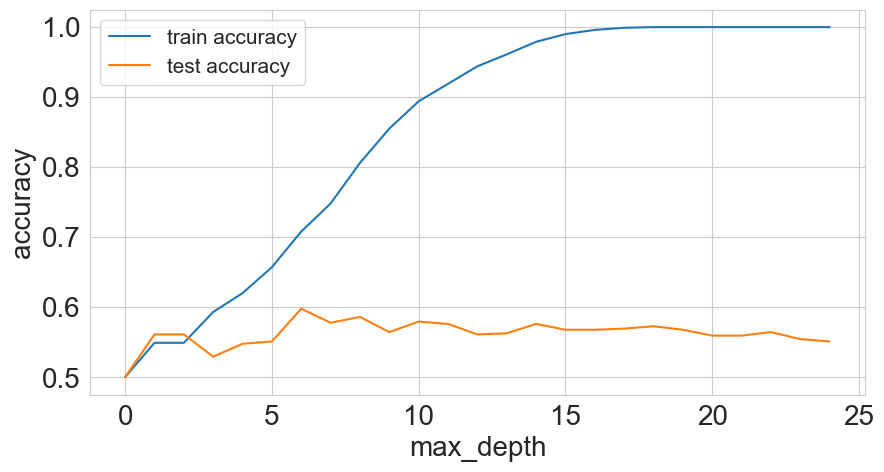

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

%matplotlib inline

# initialize lists to store accuracies for training and test data
train_accuracies = [0.5]
test_accuracies = [0.5]

for depth in range(1, 25):
    # init the model
    clf = DecisionTreeClassifier(max_depth=depth)
    
    # columns for training
    cols = [
        'fixed acidity',
        'volatile acidity', 
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide', 
        'total sulfur dioxide', 
        'density',
        'pH', 
        'sulphates', 
        'alcohol'
    ]
    
    # fit the model on selected features
    clf.fit(df_train[cols], df_train['quality'])

    # create training and test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(df_train['quality'], train_predictions)
    test_accuracy = metrics.accuracy_score(df_test['quality'], test_predictions)

    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
plt.plot(train_accuracies, label='train accuracy')
plt.plot(test_accuracies, label='test accuracy')
plt.legend(loc='upper left', prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel('max_depth', size=20)
plt.ylabel('accuracy', size=20)
plt.show()

The above describes the phenomenon of overfitting, which happens when a ML model learns too much information from the training dataset by using a very flexible model. However, such a model don't generalize well on the test dataset. It simply captures too much information from the training data.
If the model is flexible much, it'll memorize all the information in the training data, thus achieving perfect performance on the training dataset.

There are some widely used cross-validation techniques:

- k-fold cross-validation
- stratified k-fold cross-validation
- hold-out based validation
- leave-one-out cross-validation
- group k-fold cross-validation

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold

df = pd.read_csv('./data/train.csv')

# create a new column called kfold and fill it with -1
df['kfold'] = -1

# randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)

# initiate the kfold class
kf = KFold(n_splits=5)

for fold, (train_idx, test_idx) in enumerate(kf.split(X=df)):
    df.loc[test_idx, 'kfold'] = fold


Stratified k-fold cross-validation

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold

df = pd.read_csv('train.csv')


# we create a new column called kfold and fill it with -1
df['kfold'] = -1

# randomly shuffle teh data
df = df.sample(frac=1).reset_index(drop=True)

# fetch targest
y = df['target'].values

kf = StratifiedKFold(n_splits=5)

for fold, (train_indices, test_indices) in enumerate(kf.split(X=df, y=y)):
    df.loc[test_indices, 'kfold'] = fold

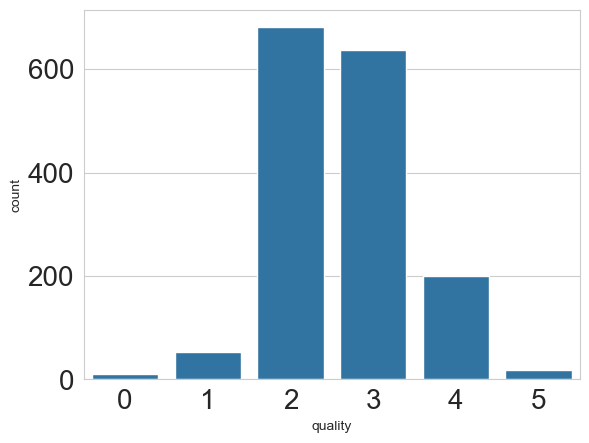

In [98]:
b = sns.countplot(x='quality', data=df)

k-fold cross-validation on regression problems

In [99]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import StratifiedKFold

In [101]:
def create_folds(data):
    # create a new column called kfold and fill it with -1
    data['kfold'] = -1
    
    # the next step is to randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)
    
    # clculate the number of bins using Sturge's rule
    num_bins = int(np.floor(1 + np.log2(len(data))))

    # bin targets
    data.loc[:, 'bins'] = pd.cut(
        data['target'],
        bins=num_bins,
        labels=False
    )
    
    # initialize teh kfold class
    kf = StratifiedKFold(n_splits=5)
    
    # fill the new kfold column
    for fold, (train_indices, test_indices) in enumerate(kf.split(X=data, y=data['bins'].values)):
        data.loc[test_indices, 'kfold'] = fold
        
    # drop the bins
    data = data.drop('bins', axis=1)

    return data

In [102]:
X, y = datasets.make_regression(
    n_samples=15000, n_features=100, n_targets=1
)

In [104]:
df = pd.DataFrame(X, columns=[f'f_{i}' for i in range(X.shape[1])])
df.loc[:, 'target'] = y

In [106]:
df = create_folds(df)

In [107]:
df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
0,0.146784,-0.296731,0.308714,-0.008435,1.960442,-1.138339,-0.953834,-0.012499,-0.121147,1.675107,...,0.328534,-0.377643,0.087435,0.213001,1.566505,-0.171512,0.180450,1.579471,10.651444,0
1,2.411360,-0.012190,0.416772,-1.129014,2.665996,-0.968932,0.114873,-2.237662,-1.585883,-0.652903,...,0.589084,0.491846,2.058741,0.900518,-0.278414,-1.057976,0.194336,1.053449,-118.676233,0
2,0.678746,0.221305,-0.606761,-0.167201,-0.451335,-1.328319,-0.027593,-0.163296,2.350322,0.296589,...,-1.412033,-0.045654,0.565039,-0.571205,-0.505455,-0.389349,2.281297,-0.125002,-101.169736,0
3,0.847983,0.260759,0.401344,0.250195,-1.255670,1.054578,-0.067655,0.925243,-0.170228,-1.177535,...,-0.693139,1.049789,1.052553,-1.040936,0.691961,-0.709209,-0.768416,-1.497039,-17.328743,0
4,0.383561,-1.079202,-1.124447,-0.957387,-1.027379,-0.223157,1.642991,-1.800942,-0.586089,0.026316,...,-1.480859,-0.230184,-0.419580,0.562576,-2.182123,0.970185,-0.699637,0.059495,-27.877217,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.098252,-0.959705,0.154828,0.225877,-0.869761,0.403988,-0.295939,0.863635,0.369065,0.965563,...,-0.099064,-1.292015,0.981822,1.225441,-1.205566,0.647740,2.677662,0.324674,81.875299,4
14996,1.013071,0.213084,-0.677619,0.568437,-0.754026,-1.316011,-0.682279,-1.797904,-0.108784,-0.409804,...,-0.362320,0.938296,-0.387958,-0.201583,0.271282,-0.107520,0.111224,0.578886,12.643712,4
14997,1.394939,-0.593571,1.329741,0.872137,0.288107,-1.461796,-1.348758,0.551372,-1.518828,-0.386912,...,1.557132,1.461281,1.010498,-2.096779,-0.839362,-0.848422,-0.574896,2.051445,-185.374103,4
14998,0.155492,0.053050,0.168946,0.889345,-1.059144,1.965455,0.949908,-1.485956,-1.404864,1.408708,...,1.117943,0.605524,-0.538162,1.087921,-1.042422,-0.447227,-0.539258,-0.406380,490.660173,4


In [110]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# load the data and split it into three parts
X, y = load_iris(return_X_y=True)

# first split off the test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=23)

# then split off the validation set
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=23)

# create a list to hold validation scores for each hyper-parameter setting
val_scores = []

# specify a list of values we want to try for n_neighbors
neighbors = np.arange(1, 15, 2)

# validate for each potential value of n_neighbors
for i in neighbors:
    # build a model
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    # score validation set accuracy
    val_scores.append(knn.score(X_val, y_val))

# using max to tell us the best socre
print(f'validation scores: {val_scores}')
print(f'best validation score: {np.max(val_scores):.3f}')

# find the best value of n_neighbors used
best_n_neighbors = neighbors[np.argmax(val_scores)]
print(f'best n_neighbors: {best_n_neighbors}')

# now re-train the model with both train and  validation dataset
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_trainval, y_trainval)

print(f'test-set score: {knn.score(X_test, y_test)}')

validation scores: [0.9642857142857143, 1.0, 0.9285714285714286, 0.9642857142857143, 1.0, 1.0, 1.0]
best validation score: 1.000
best n_neighbors: 3
test-set score: 0.9736842105263158


What this tells us is that, in a machine learning project, we typically split the dataset into three parts:

- training set
- validation set
- test set

The training and validation set are used together to evaluate the performance of a particular model with a particular set of parameters.
We could try various models and various hyperparameter settings based on the performance on the validation set.
After we identify the best model and its best hyperparameters, we test them on the test set.

## Cross-validation with scikit-learn

In [111]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_val_score(KNeighborsClassifier(), X_trainval, y_trainval, cv=10)
scores

array([0.91666667, 0.91666667, 0.90909091, 0.90909091, 1.        ,
       0.90909091, 1.        , 1.        , 1.        , 0.90909091])

In [112]:
import pandas as pd
cv_result = cross_validate(KNeighborsClassifier(), X_trainval, y_trainval)
pd.DataFrame(cv_result)

,fit_time,score_time,test_score
0,0.000352,0.001577,0.913043
1,0.000283,0.002951,0.913043
2,0.000512,0.003498,0.954545
3,0.000359,0.001577,1.000000
4,0.000728,0.002700,0.954545


In [113]:
cv_result = cross_validate(KNeighborsClassifier(), X_trainval, y_trainval, return_train_score=True)
pd.DataFrame(cv_result)

,fit_time,score_time,test_score,train_score
0,0.000387,0.001434,0.913043,0.966292
1,0.000472,0.004664,0.913043,0.955056
2,0.000336,0.003498,0.954545,0.977778
3,0.000292,0.001094,1.000000,0.955556
4,0.001097,0.001389,0.954545,0.966667


## Grid-search with Cross-validation

In [115]:
# we split our data into only two parts
# usually we'd call these X_train and X_test
# we use X_trainval to emphasize taht it takes teh same role as X_trainval above
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=23)

cross_val_scores = []
neighbors = np.arange(1, 15, 2)

for i in neighbors:
    # we define the model with hyper-parameters
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # instead of fitting a single model, we perform cross-validation fitting 10 models, and returning 10 scores
    scores = cross_val_score(knn, X_trainval, y_trainval, cv=10)

    # we record the average score over the 10 folds
    cross_val_scores.append(np.mean(scores))
    
# we can compute the best mean score
print(f'best cross-validation score: {np.max(cross_val_scores)}')

# best hyper-parameter
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print(f'best n_neighbors: {best_n_neighbors}')

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_trainval, y_trainval)
print(f'test-set scores: {knn.score(X_test, y_test)}')

best cross-validation score: 0.974242424242424
best n_neighbors: 13
test-set scores: 1.0


## GridSearchCV

In [118]:
from sklearn.model_selection import GridSearchCV

# split the data  as before
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

# define the parameter grid, key must be exactly the same as parameter name
param_grid = {
    'n_neighbors': np.arange(1, 15, 2)
}

# instantiate GridSearchCV - this sets up the grid search
grid = GridSearchCV(KNeighborsClassifier(),
                    param_grid=param_grid,
                    cv=10,
                    return_train_score=True)

# fit
grid.fit(X_train, y_train)

print(f'best mean cross-validation score: {grid.best_score_}')
print(f'best parameters: {grid.best_params_}')

# do the final evaluation
print(f'test-set score: {grid.score(X_test, y_test)}')

best mean cross-validation score: 0.974242424242424
best parameters: {'n_neighbors': 13}
test-set score: 1.0


In [119]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000378,0.000244,0.000969,0.000293,1,{'n_neighbors': 1},0.916667,1.000000,0.909091,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000245,0.000055,0.000712,0.000156,3,{'n_neighbors': 3},0.916667,1.000000,0.909091,1.000000,...,0.960396,0.950495,0.950495,0.970297,0.950495,0.950495,0.950495,0.960396,0.956356,0.007908
2,0.000216,0.000019,0.000654,0.000070,5,{'n_neighbors': 5},0.916667,0.916667,0.909091,0.909091,...,0.950495,0.960396,0.950495,0.980198,0.960396,0.960396,0.940594,0.980198,0.960317,0.012541
3,0.000240,0.000036,0.000723,0.000131,7,{'n_neighbors': 7},0.916667,0.916667,0.909091,1.000000,...,0.970297,0.970297,0.970297,0.960396,0.970297,0.960396,0.970297,0.980198,0.971248,0.006880
4,0.000211,0.000015,0.000630,0.000020,9,{'n_neighbors': 9},0.916667,0.916667,0.909091,1.000000,...,0.970297,0.950495,0.970297,0.970297,0.960396,0.970297,0.970297,0.990099,0.969248,0.009335
5,0.000209,0.000008,0.000659,0.000082,11,{'n_neighbors': 11},0.916667,0.916667,1.000000,1.000000,...,0.970297,0.980198,0.980198,0.970297,0.960396,0.970297,0.970297,0.980198,0.975218,0.007952
6,0.000229,0.000020,0.000686,0.000075,13,{'n_neighbors': 13},0.916667,0.916667,1.000000,1.000000,...,0.970297,0.960396,0.970297,0.970297,0.960396,0.970297,0.970297,0.970297,0.970257,0.006200


In [120]:
results = pd.DataFrame(grid.cv_results_)
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [121]:
results.params

0     {'n_neighbors': 1}
1     {'n_neighbors': 3}
2     {'n_neighbors': 5}
3     {'n_neighbors': 7}
4     {'n_neighbors': 9}
5    {'n_neighbors': 11}
6    {'n_neighbors': 13}
Name: params, dtype: object

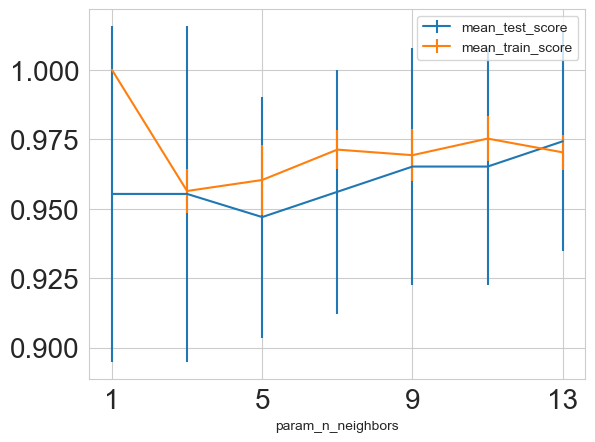

In [122]:
import matplotlib.pyplot as plt
# we use std for error bars.
# Some people might perfer the 95% confidence interval or the standard error of the mean
ax = results.plot('param_n_neighbors', 'mean_test_score', yerr='std_test_score')
# reuse the axes from the first plot (ax=ax)
results.plot('param_n_neighbors', 'mean_train_score', yerr='std_train_score', ax=ax)
plt.legend()

## Evaluation Metics

In [123]:
def accuracy(y_true, y_pred):
    """function to calculate accuracy

    Args:
        y_true (list): list of true values
        y_pred (list): list of predicted values
    """
    
    correct_counter = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct_counter += 1
    
    return correct_counter / len(y_true)

In [124]:
from sklearn.metrics import accuracy_score

l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
accuracy_score(l1, l2)

0.625

In [125]:
def true_positive(y_true, y_pred):
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
            
    return tp

In [126]:
def true_negative(y_true, y_pred):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

In [127]:
def false_positive(y_true, y_pred):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

In [128]:
def false_negative(y_true, y_pred):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [129]:
true_positive(l1, l2)

2

In [130]:
false_positive(l1, l2)

1

In [131]:
def accuracy_v2(y_true, y_pred):
    tp = true_positive(y_true, y_pred=y_pred)
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    accuracy_score = (tp + tn) / (tp + fp + tn + fn)
    return accuracy_score

In [132]:
def precision(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    return tp / (tp + fp)

In [133]:
precision(l1, l2)

0.6666666666666666

In [134]:
def recall(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
    return recall

In [135]:
recall(l1, l2)

0.5

In [136]:
def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true,  y_pred)
    
    score = 2 * p * r / (p + r)
    return score

In [156]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = np.abs(np.random.rand(1, 20)[0])
y_pred

array([0.55498412, 0.91577027, 0.02488411, 0.24459857, 0.99445462,
       0.43687871, 0.97138765, 0.25281066, 0.70766619, 0.47971034,
       0.51118551, 0.24801081, 0.58014591, 0.32350797, 0.98644422,
       0.15246585, 0.23943946, 0.62210241, 0.06266136, 0.84478134])

Text(0, 0.5, 'precision')

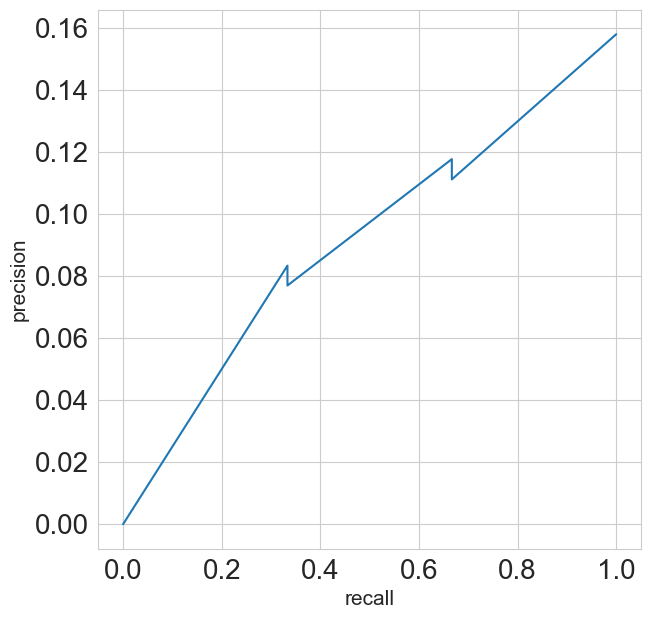

In [157]:
precisions = []
recalls = []

thresholds = [
    0.0490937 , 0.05934905, 0.079377, 
    0.08584789, 0.11114267, 0.11639273,
    0.15952202, 0.17554844,  0.18521942, 
    0.27259048, 0.31620708, 0.33056815,
    0.39095342, 0.61977213
]

for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]

    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    precisions.append(p)
    recalls.append(r)
    
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('recall', fontsize=15)
plt.ylabel('precision', fontsize=15)

In [158]:
f1

<function __main__.f1(y_true, y_pred)>

In [159]:
def tpr(y_true, y_pred):
    return recall(y_true, y_pred)

In [161]:
def fpr(y_true, y_pred):
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (tn + fp)

In [166]:
tpr_list = []
fpr_list = []

y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
0.85, 0.15, 0.99]

thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

for thresh in thresholds:
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    
    temp_tpr = tpr(y_true, temp_pred)
    temp_fpr = fpr(y_true, temp_pred)
    
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

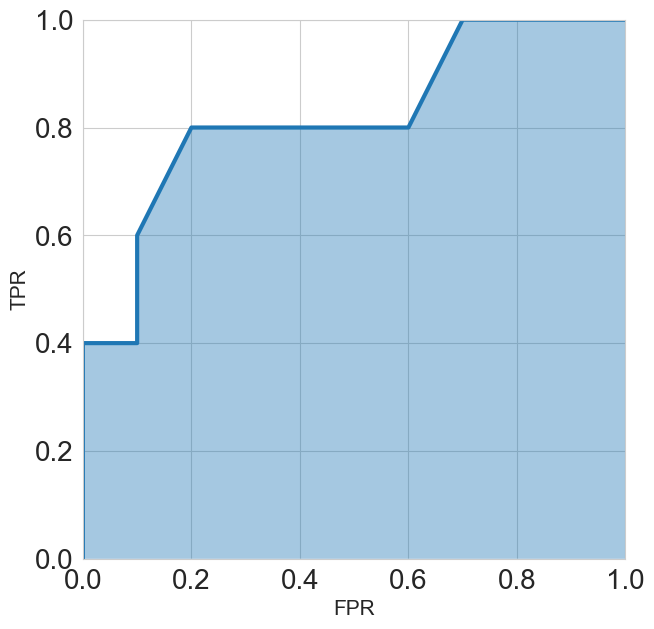

In [167]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

In [168]:
from sklearn import metrics

y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]

y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
0.85, 0.15, 0.99]

metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

In [169]:
import numpy as np

def log_loss(y_true, y_prob):
    # define an epsilon value
    eps = 1e-15
    loss = []
    for yt, yp in zip(y_true, y_prob):
        yp = np.clip(yp, eps, 1 - eps)
        
        temp_loss = -1.0 * (
            yt * np.log(yp) + (1 - yt) * np.log(1 - yp)
        )
        loss.append(temp_loss)
        
    return np.mean(loss)